In [1]:
import numpy as np
import jellymove as jm
import seaborn as sns
sns.set_style("darkgrid")

# train activity classifier

### read features

In [52]:
jmc = jm.JellyMoveClassifier(jm.INSITU_IDS + jm.LABORATORY_IDS, jm.INSITU_IDS)

Reading features...
  features/051724_activity_features.npz has no annotated data.
  features/0518e2_activity_features.npz has no unannotated data.
  features/0521e2_activity_features.npz has no unannotated data.
  features/0521b7_activity_features.npz has no unannotated data.
  features/0531b7_activity_features.npz has no unannotated data.
4382 annotated and 51479 unannotated activity periods, 46 features.

Reading features...
  features/051724_influence_features.npz has no annotated data.
1311 annotated and 51479 unannotated influence periods, 46 features.



### train with feature selection

In [27]:
act_eer_threshold = 0.4
act_classifier, act_feature_idx, act_pr = jmc.train_with_sfs(
    "activity", use_sfs=True, decision_threshold=act_eer_threshold)

Training activity classifier on:
85 drifting periods (1.94%), 4297 swimming periods.

Starting fold 0 of outer CV.
 Selecting feature 15, improving inner CV AUPRC from 0.00 to 0.64.
 Selecting feature 11, improving inner CV AUPRC from 0.64 to 0.74.
 Selecting feature 9, improving inner CV AUPRC from 0.74 to 0.78.
 Terminating feature selection after 3 features.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.77. Precision: 0.58. Recall: 0.73. Accuracy: 0.99.

Starting fold 1 of outer CV.
 Selecting feature 15, improving inner CV AUPRC from 0.00 to 0.63.
 Selecting feature 11, improving inner CV AUPRC from 0.63 to 0.73.
 Selecting feature 20, improving inner CV AUPRC from 0.73 to 0.76.
 Terminating feature selection after 3 features.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.81. Precision: 0.88. Recall: 0.79. Accuracy: 0.99.

Starting fold 2 of outer CV.
 Selecting feature 15, improving inner CV AUPRC from 0.00 to 0.64.
 Se

### find equal error rate (EER) threshold

In [28]:
act_eer_threshold = jm.get_eer_threshold(act_pr)

EER threshold: 0.4. Precision: 0.743 (SE = 0.049). Recall: 0.764 (SE = 0.027).


# train tether-influence

In [29]:
inf_eer_threshold = 0.1
inf_classifier, inf_feature_idx, inf_pr = jmc.train_with_sfs(
    "influence", use_sfs=True, decision_threshold=inf_eer_threshold)

Training influence classifier on:
83 influenced periods (6.33%), 1228 uninfluenced periods.

Starting fold 0 of outer CV.
 Selecting feature 4, improving inner CV AUPRC from 0.00 to 0.69.
 Selecting feature 23, improving inner CV AUPRC from 0.69 to 0.83.
 Selecting feature 13, improving inner CV AUPRC from 0.83 to 0.87.
 Selecting feature 26, improving inner CV AUPRC from 0.87 to 0.93.
 Terminating feature selection after 4 features.
Predictions on outer validation set (with decision threshold 0.1):
 AUPRC: 0.84. Precision: 0.85. Recall: 0.85. Accuracy: 0.98.

Starting fold 1 of outer CV.
 Selecting feature 4, improving inner CV AUPRC from 0.00 to 0.68.
 Selecting feature 23, improving inner CV AUPRC from 0.68 to 0.81.
 Selecting feature 26, improving inner CV AUPRC from 0.81 to 0.85.
 Selecting feature 13, improving inner CV AUPRC from 0.85 to 0.92.
 Terminating feature selection after 4 features.
Predictions on outer validation set (with decision threshold 0.1):
 AUPRC: 0.97. Precisi

### find EER threshold

In [30]:
inf_eer_threshold = jm.get_eer_threshold(inf_pr)

EER threshold: 0.1. Precision: 0.861 (SE = 0.053). Recall: 0.735 (SE = 0.038).


# plot precision-recall curves

### activity classifier

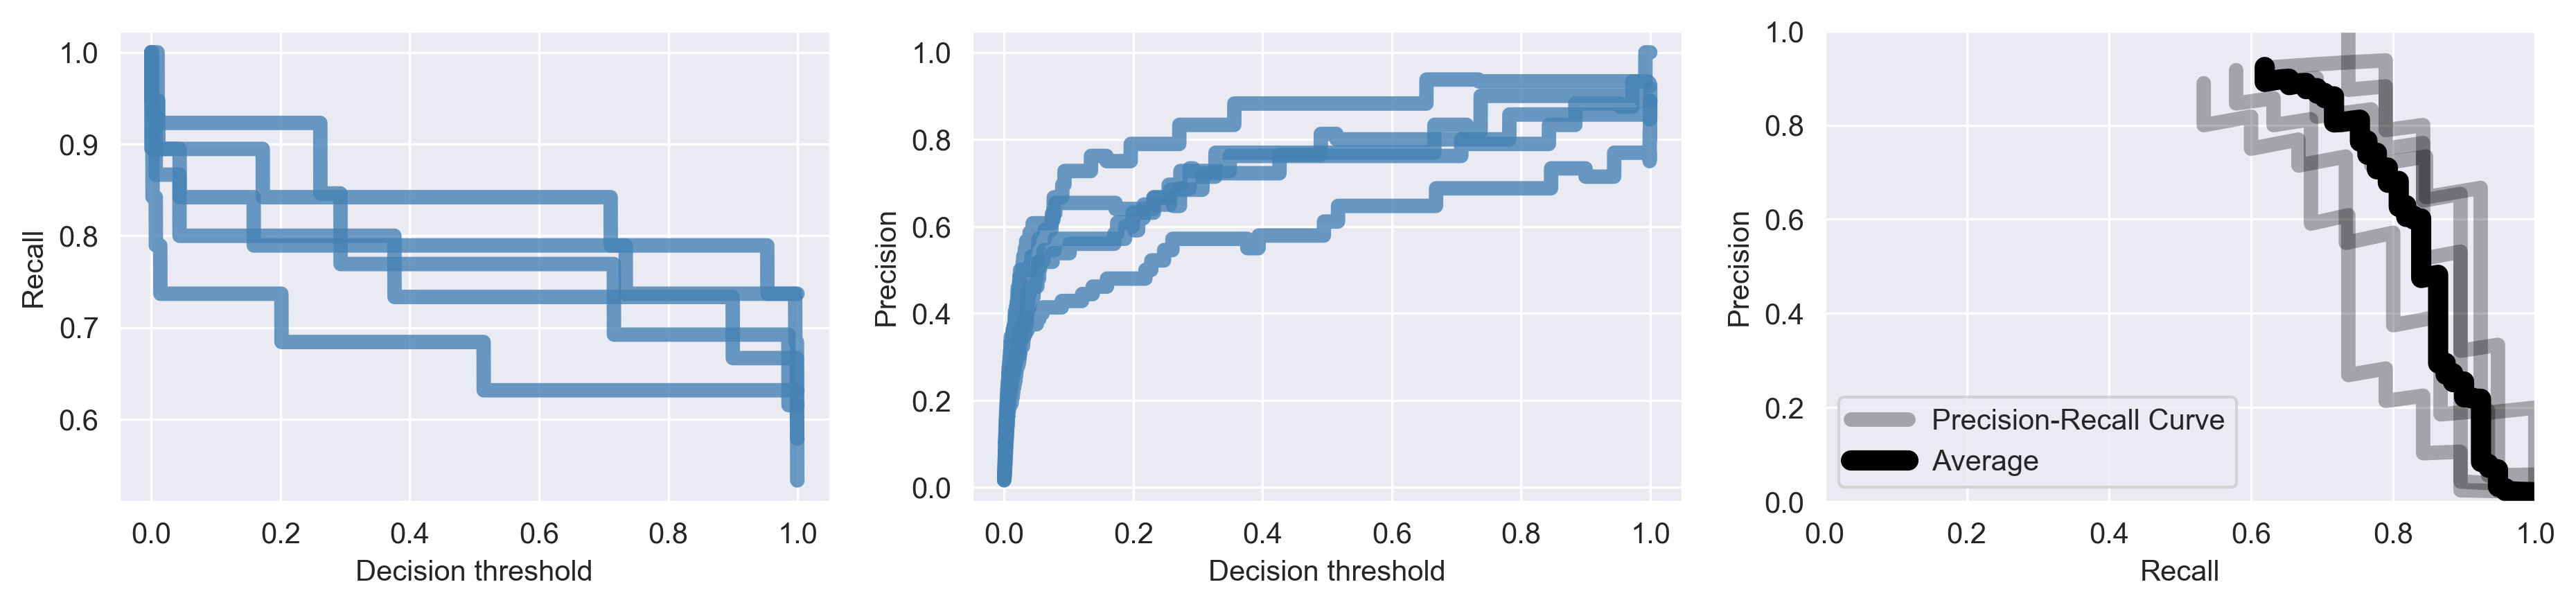

In [54]:
avg_rec, avg_prec = jm.plot_precision_and_recall(*act_pr)

### influence classifier

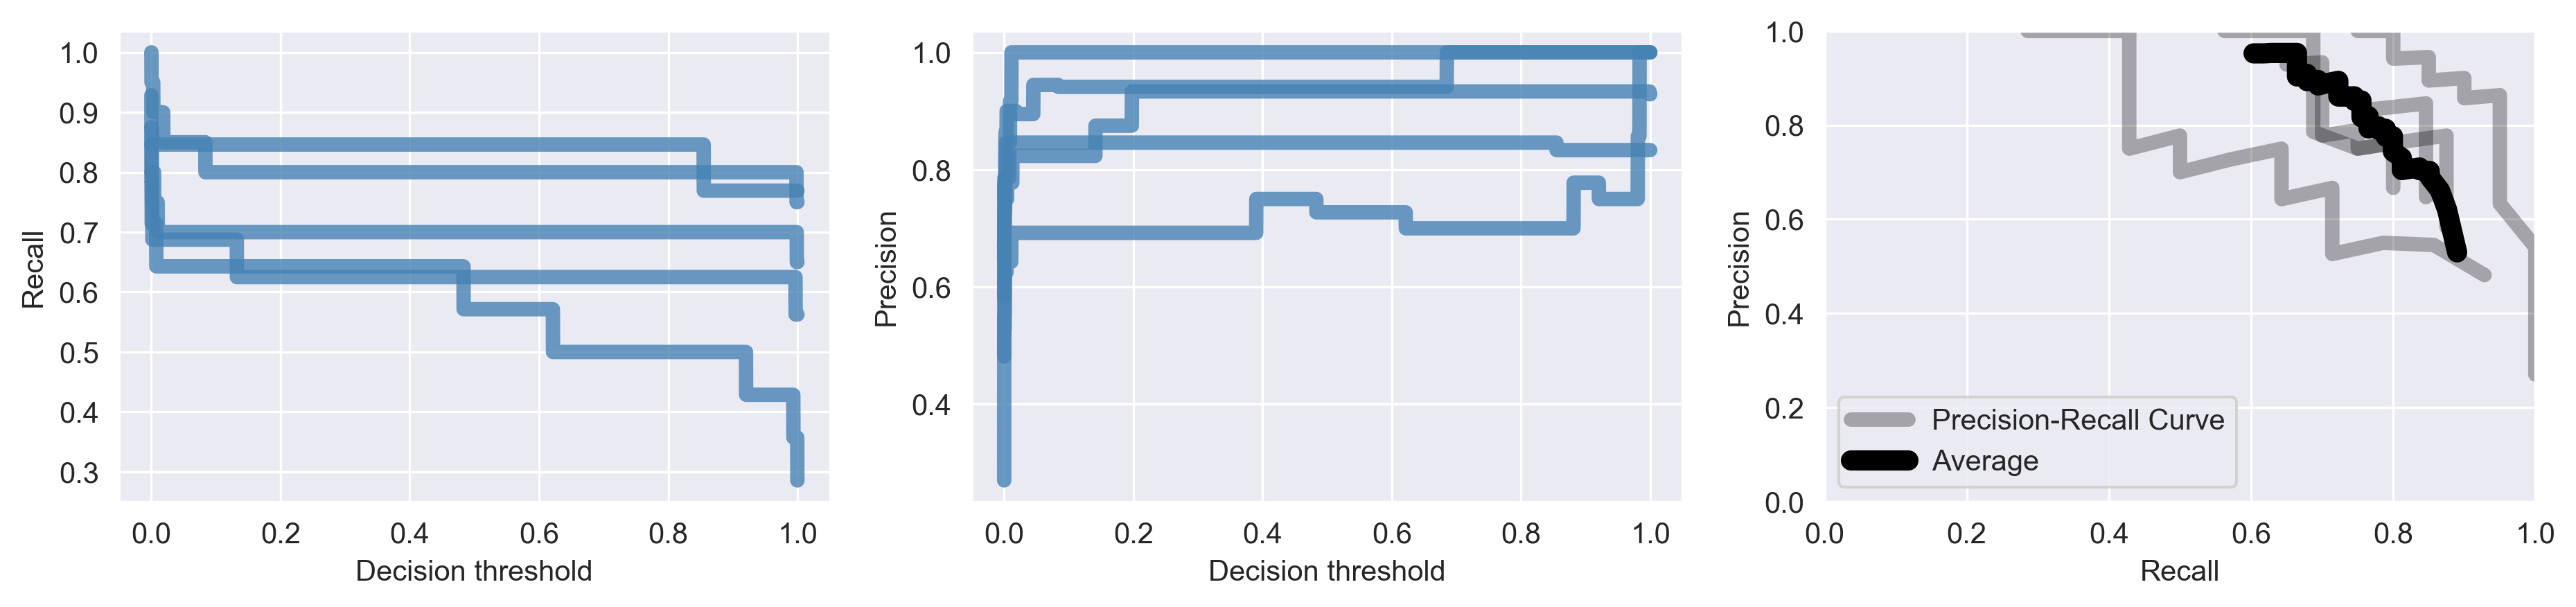

In [55]:
avg_rec, avg_prec = jm.plot_precision_and_recall(*inf_pr)

# predict tether influence and activity of unannotated data

In [59]:
jmc.predict(inf_threshold=inf_eer_threshold, act_threshold=act_eer_threshold)

Deployment 042424:
  Periods predicted as influenced: 2131 out of 6065 (35.14%).
  Periods predicted as drifting: 750 out of 3934 (19.06%).
Deployment 0424e2:
  Periods predicted as influenced: 598 out of 9897 (6.04%).
  Periods predicted as drifting: 80 out of 9299 (0.86%).
Deployment 04243c:
  Periods predicted as influenced: 286 out of 1352 (21.15%).
  Periods predicted as drifting: 0 out of 1066 (0.00%).
Deployment 051424:
  Periods predicted as influenced: 271 out of 8201 (3.30%).
  Periods predicted as drifting: 0 out of 7930 (0.00%).
Deployment 0514e2:
  Periods predicted as influenced: 435 out of 8688 (5.01%).
  Periods predicted as drifting: 5 out of 8253 (0.06%).
Deployment 051724:
  Periods predicted as influenced: 135 out of 1381 (9.78%).
  Periods predicted as drifting: 8 out of 1246 (0.64%).
Deployment 0517e2:
  Periods predicted as influenced: 682 out of 2419 (28.19%).
  Periods predicted as drifting: 98 out of 1737 (5.64%).
Deployment 0517b7:
  Periods predicted as infl

# train activity classifier on laboratory data, test on in situ data

### train on laboratory data

In [50]:
lab_jmc = jm.JellyMoveClassifier(jm.LABORATORY_IDS, jm.INSITU_IDS)

Reading features...
  features/0518e2_activity_features.npz has no unannotated data.
  features/0521e2_activity_features.npz has no unannotated data.
  features/0521b7_activity_features.npz has no unannotated data.
  features/0531b7_activity_features.npz has no unannotated data.
3137 annotated and 0 unannotated activity periods, 46 features.

Reading features...
  features/051724_influence_features.npz has no annotated data.
1311 annotated and 51479 unannotated influence periods, 46 features.



In [40]:
lab_eer_threshold = 0.2
lab_classifier, lab_feature_idx, lab_pr = lab_jmc.train_with_sfs(
    "activity", use_sfs=True, decision_threshold=lab_eer_threshold)

Training activity classifier on:
68 drifting periods (2.17%), 3069 swimming periods.

Starting fold 0 of outer CV.
 Selecting feature 33, improving inner CV AUPRC from 0.00 to 0.98.
 Terminating feature selection after 1 features.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.65. Precision: 0.70. Recall: 0.82. Accuracy: 0.99.

Starting fold 1 of outer CV.
 Selecting feature 38, improving inner CV AUPRC from 0.00 to 0.93.
 Selecting feature 9, improving inner CV AUPRC from 0.93 to 0.98.
 Terminating feature selection after 2 features.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 1.00. Precision: 1.00. Recall: 1.00. Accuracy: 1.00.

Starting fold 2 of outer CV.
 Selecting feature 38, improving inner CV AUPRC from 0.00 to 0.97.
 Terminating feature selection after 1 features.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.85. Precision: 0.77. Recall: 1.00. Accuracy: 1.00.

Starting fold 3 of outer C

### find EER threshold

In [45]:
lab_eer_threshold = jm.get_eer_threshold(lab_pr)

EER threshold: 0.2. Precision: 0.874 (SE = 0.061). Recall: 0.903 (SE = 0.044).


### test on in situ data

In [65]:
jm.predict_in_situ_activity(
    lab_jmc.act_classifier, lab_jmc.activity_feature_idx, decision_threshold=lab_eer_threshold)

Reading features...
  features/051724_activity_features.npz has no annotated data.
Predictions on 042424:
  Accuracy: 1.000. Precision: 0.000. Recall: 0.000.
Predictions on 0424e2:
  Accuracy: 0.965. Precision: 0.000. Recall: 0.000.
Predictions on 04243c:
  Accuracy: 0.988. Precision: 0.000. Recall: 0.000.
Predictions on 051424:
  Accuracy: 0.992. Precision: 0.000. Recall: 0.000.
Predictions on 0514e2:
  Accuracy: 0.993. Precision: 0.000. Recall: 0.000.
Predictions on 0517e2:
  Accuracy: 0.618. Precision: 0.000. Recall: 0.000.
Predictions on 0517b7:
  Accuracy: 0.654. Precision: 0.000. Recall: 0.000.
Total:
  Accuracy: 0.963. Precision: 0.000. Recall: 0.000.


### train OBDA thresholding on laboratory data

In [38]:
odbalab_jmc = jm.JellyMoveClassifier(jm.LABORATORY_IDS, jm.INSITU_IDS)

Reading features...
  features/0518e2_activity_features.npz has no unannotated data.
  features/0521e2_activity_features.npz has no unannotated data.
  features/0521b7_activity_features.npz has no unannotated data.
  features/0531b7_activity_features.npz has no unannotated data.
3137 annotated and 0 unannotated activity periods, 46 features.

Reading features...
  features/051724_influence_features.npz has no annotated data.
1311 annotated and 51479 unannotated influence periods, 46 features.



Notice the optimistic AUPRC, precision, recall, and accuracy estimated below when training solely on laboratory data. Compare this with the precision and recall of zero when predicting activity of in situ data, further down.

In [43]:
odbalab_eer_threshold = 0.4
odbalab_classifier, _, odbalab_pr = odbalab_jmc.train_with_sfs(
    "activity", allowed_features=jm.MEAN_ODBA_FEATURE, use_sfs=False, decision_threshold=odbalab_eer_threshold)

Training activity classifier on:
68 drifting periods (2.17%), 3069 swimming periods.

Starting fold 0 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.89. Precision: 0.75. Recall: 0.88. Accuracy: 0.99.

Starting fold 1 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.96. Precision: 0.83. Recall: 0.83. Accuracy: 0.99.

Starting fold 2 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.87. Precision: 0.69. Recall: 0.90. Accuracy: 0.99.

Starting fold 3 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.69. Precision: 0.64. Recall: 0.70. Accuracy: 0.99.

Starting fold 4 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.4):
 AUPRC: 0.92. Precision: 1.00. Recall: 0.74. Accuracy: 0.99.

Average outer validation

### find EER threshold

In [41]:
odbalab_eer_threshold = jm.get_eer_threshold(odbalab_pr)

EER threshold: 0.4. Precision: 0.782 (SE = 0.063). Recall: 0.811 (SE = 0.040).


### test on in situ data

In [46]:
jm.predict_in_situ_activity(
    odbalab_jmc.act_classifier, jm.MEAN_ODBA_FEATURE, decision_threshold=odbalab_eer_threshold)

Reading features...
  features/051724_activity_features.npz has no annotated data.
Predictions on 042424:
  Accuracy: 0.917. Precision: 0.000. Recall: 0.000.
Predictions on 0424e2:
  Accuracy: 0.682. Precision: 0.000. Recall: 0.000.
Predictions on 04243c:
  Accuracy: 0.988. Precision: 0.000. Recall: 0.000.
Predictions on 051424:
  Accuracy: 0.973. Precision: 0.000. Recall: 0.000.
Predictions on 0514e2:
  Accuracy: 0.934. Precision: 0.000. Recall: 0.000.
Predictions on 0517e2:
  Accuracy: 0.647. Precision: 0.000. Recall: 0.000.
Predictions on 0517b7:
  Accuracy: 0.577. Precision: 0.000. Recall: 0.000.
Total:
  Accuracy: 0.908. Precision: 0.000. Recall: 0.000.


# activity classifier baselines

### train ODBA thresholding

In [53]:
odba_jmc = jm.JellyMoveClassifier(jm.INSITU_IDS + jm.LABORATORY_IDS, jm.INSITU_IDS)

Reading features...
  features/051724_activity_features.npz has no annotated data.
  features/0518e2_activity_features.npz has no unannotated data.
  features/0521e2_activity_features.npz has no unannotated data.
  features/0521b7_activity_features.npz has no unannotated data.
  features/0531b7_activity_features.npz has no unannotated data.
4382 annotated and 51479 unannotated activity periods, 46 features.

Reading features...
  features/051724_influence_features.npz has no annotated data.
1311 annotated and 51479 unannotated influence periods, 46 features.



In [35]:
odba_eer_threshold = 0.2
odba_classifier, _, odba_pr = odba_jmc.train_with_sfs(
    "activity", allowed_features=jm.MEAN_ODBA_FEATURE, use_sfs=False, decision_threshold=odba_eer_threshold)

Training activity classifier on:
85 drifting periods (1.94%), 4297 swimming periods.

Starting fold 0 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.48. Precision: 0.55. Recall: 0.40. Accuracy: 0.98.

Starting fold 1 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.60. Precision: 0.69. Recall: 0.58. Accuracy: 0.99.

Starting fold 2 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.60. Precision: 0.75. Recall: 0.47. Accuracy: 0.99.

Starting fold 3 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.47. Precision: 0.46. Recall: 0.46. Accuracy: 0.98.

Starting fold 4 of outer CV.
Using features: 45.
Predictions on outer validation set (with decision threshold 0.2):
 AUPRC: 0.78. Precision: 1.00. Recall: 0.58. Accuracy: 0.99.

Average outer validation

### find EER threshold

In [36]:
odba_eero_threshold = jm.get_eer_threshold(odba_pr)

EER threshold: 0.2. Precision: 0.689 (SE = 0.093). Recall: 0.499 (SE = 0.035).


### train only with accelerometry features (no gyroscope)

In [54]:
acc_jmc = jm.JellyMoveClassifier(jm.INSITU_IDS + jm.LABORATORY_IDS, jm.INSITU_IDS)

Reading features...
  features/051724_activity_features.npz has no annotated data.
  features/0518e2_activity_features.npz has no unannotated data.
  features/0521e2_activity_features.npz has no unannotated data.
  features/0521b7_activity_features.npz has no unannotated data.
  features/0531b7_activity_features.npz has no unannotated data.
4382 annotated and 51479 unannotated activity periods, 46 features.

Reading features...
  features/051724_influence_features.npz has no annotated data.
1311 annotated and 51479 unannotated influence periods, 46 features.



In [32]:
acc_eer_threshold = 0.8
acc_classifier, acc_feature_idx, acc_pr = acc_jmc.train_with_sfs(
    "activity", allowed_features=jm.ACCELEROMETRY_FEATURES, use_sfs=True, decision_threshold=acc_eer_threshold)

Training activity classifier on:
85 drifting periods (1.94%), 4297 swimming periods.

Starting fold 0 of outer CV.
 Selecting feature 10, improving inner CV AUPRC from 0.00 to 0.59.
 Selecting feature 9, improving inner CV AUPRC from 0.59 to 0.67.
 Selecting feature 18, improving inner CV AUPRC from 0.67 to 0.71.
 Terminating feature selection after 3 features.
Predictions on outer validation set (with decision threshold 0.8):
 AUPRC: 0.65. Precision: 0.70. Recall: 0.47. Accuracy: 0.99.

Starting fold 1 of outer CV.
 Selecting feature 10, improving inner CV AUPRC from 0.00 to 0.56.
 Selecting feature 9, improving inner CV AUPRC from 0.56 to 0.64.
 Terminating feature selection after 2 features.
Predictions on outer validation set (with decision threshold 0.8):
 AUPRC: 0.70. Precision: 0.62. Recall: 0.68. Accuracy: 0.98.

Starting fold 2 of outer CV.
 Selecting feature 10, improving inner CV AUPRC from 0.00 to 0.55.
 Selecting feature 9, improving inner CV AUPRC from 0.55 to 0.64.
 Sele

### find EER threshold

In [33]:
acc_eer_threshold = jm.get_eer_threshold(acc_pr)

EER threshold: 0.8. Precision: 0.641 (SE = 0.038). Recall: 0.637 (SE = 0.047).
